# Basic Algorithm

- Dynammic Programming

In [1]:
def time_wrapper():
    start_time = time.time()
    # main()
    end_time = time.time()
    global time_taken
    time_taken = (end_time - start_time)*10000000
    return time_taken

In [2]:
def process_memory():
    process = psutil.Process()
    memory_info = process.memory_info()
    memory_consumed = int(memory_info.rss/1024)
    return memory_consumed

# Input string Generator

In [3]:
import os
import sys
from resource import *
import time
import psutil
import matplotlib.pyplot as mpl
from matplotlib import patheffects
import numpy as np
import pandas as pd

In [4]:
base = "/Users/brinkley97/Documents/development/classes/csci_570_analysis_of_algorithms/"
# input_file_path = "classes/csci_570_analysis_of_algorithms/SampleTestCases/input/input1.txt"
sample_test_cases = base + "SampleTestCases/input/"
input_file = sample_test_cases + "input1.txt"
# input_file_path = input_file

datapoints_path = base + "datapoints/"
datapoint_file = datapoints_path + "in1.txt"
input_file_path = datapoint_file

In [5]:
def get_file_path(input_file_path):
    with open(input_file_path) as f:

        l2write = []
        ns = {}
        lines = f.readlines()
        strings = []

        for i in range(len(lines)):
            if lines[i].strip().isdigit() == False:
                l2write.append(0)
                strings.append(lines[i].rstrip())
                ns[strings[-1]] = []
            else:
                l2write[-1] += 1
                ns[list(ns)[-1]].append(int(lines[i].rstrip()))
        return ns

In [6]:
ns = get_file_path(input_file_path)
ns

{'CCAG': [2], 'CATG': [3]}

In [7]:
# def get_strings_with_gaps(str_list):
#     """
#     str_list --
#     return str_gaps
#     """
#     s1 = str_list[0]
#     s2 = str_list[1]
    
#     return str_gaps

In [8]:
def build_string(k, v):
    """
    k --
    v --
    return -- 
    """
    # print("k", k, "\n", v)

    final_string = k
    
    for i in v:
        new_str = final_string[:i+1] + final_string + final_string[i+1:]
        final_string = new_str

    return final_string

In [9]:
def generate_string(sequences):
    """
    sequences -- dict;
    return f_strings -- str; 
    """
    
    # print(sequences)
    
    
    f_strings = []
 
    for i, (k, v) in enumerate(sequences.items()):
        f_strings.append(build_string(k, v))
        # print("f_strings: ", f_strings)         
    
    return f_strings

In [10]:
get_generated_strings = generate_string(ns)
# print(get_generated_strings)

# Alignment Cost

In [11]:
alpha_list = [
    [0, 110, 48, 94],
    [110, 0, 118, 48],
    [48, 118, 0, 110],
    [94, 48, 110, 0]]

delta_val = 30

In [12]:
def get_alpha(x):
    '''Match letters
    x -- char 
    
    return -- alpha int
    '''
    
    if x == 'A':
        return 0
    elif x == 'C':
        return 1
    elif x == 'G':
        return 2
    elif x == 'T':
        return 3

In [13]:
def alignment_cost(X, Y, alpha_list, delta):
    '''
    X -- str
    Y -- str
    alpha_list -- 2D list
    delta -- int
    
    return -- OPT_alignment_cost, OPT_alignment_matrix
    '''
    X_length = len(X)
    Y_length = len(Y)
    
    # cols (x) by rows (y)
    OPT = [[0 for x in range(X_length + 1)] for y in range(Y_length + 1)]


    # base cases/initialize
    OPT[0][0] = 0
    
    # initialize/fix on rows: need the columns to change (going column by column)
    for col in range(X_length + 1):
        OPT[0][col] = col * delta
        
    
    # initialize/fix on rows: need the columns to change (going column by column)    
    for row in range(Y_length + 1):
        # print(col)
        OPT[row][0] = row * delta
        # print(OPT)

    # outter loop reps cols
    for i in range(1, X_length + 1):
        
        # inner loop reps rows
        for j in range(1, Y_length + 1):
            
            x_i = X[i - 1]
            y_j = Y[j - 1] 
          
            # get_alpha(letter) returns int to pass into alpha_list[int--row][int--col]  
            alpha = alpha_list[get_alpha(x_i)][get_alpha(y_j)]
            
            OPT[j][i] = min(
                        alpha + OPT[j - 1][i - 1],
                        delta + OPT[j - 1][i],
                        delta + OPT[j][i - 1]
            )
            

    return OPT[len(Y)][len(X)], OPT

In [14]:
X = get_generated_strings[0]
# print(X)
Y = get_generated_strings[1]
# print(Y)

# X = "ACTG"
# Y = "TATT"

cost, opt = alignment_cost(X, Y, alpha_list, delta_val)
# print(cost, opt)

# String Alignment

In [15]:
def get_string_alignment(opt, str1, str2, delta):
    """
    opt -- Nd matrix of opt solution
    str1 -- str;  1st string alignment
    str2 -- str;  2nd string alignment
    delta -- int
    
    return str1_alignment, str2_alignment -- str
    """
    
    # store string alignments as list and join at end to return as string
    str1_alignment = []
    str2_alignment = []
  
    # number of rows
    m = len(opt) 
    
    # number of cols
    n = len(opt[0]) 
    
    # i corresponds to rows
    i = m - 1
    
    # j corresponds to cols
    j = n - 1  
    
    while i >= 0 and j >= 0:
        
        # base case
        letterx = str1[j - 1]
        lettery = str2[i - 1]
        # print(letterx, lettery)
    
        if i == 0 and j == 0:
            break
    
        # first row; go left
        elif i == 0:
            str1_alignment.insert(0, letterx)
            str2_alignment.insert(0, '_')
            j -= 1

        # first col; go up
        elif j == 0:
            str1_alignment.insert(0, '_')
            str2_alignment.insert(0, lettery)
            i -= 1
        
        # comparisons
        else: 
            
            # go diagonally - up left
            if (opt[i - 1][j - 1] + alpha_list[get_alpha(str1[j - 1])][get_alpha(str2[ i- 1])]) == opt[i][j]:
                
                str1_alignment.insert(0, letterx) 
                str2_alignment.insert(0, lettery)
                i -= 1
                j -= 1
                
            # go up
            elif opt[i - 1][j] + delta_val == opt[i][j]:
                
                str1_alignment.insert(0, "_")
                str2_alignment.insert(0, lettery)
                i -= 1
                
            # go left    
            else:
                
                str1_alignment.insert(0, letterx) 
                str2_alignment.insert(0, "_")    
                j -= 1
        
        s1 = "".join(str1_alignment)
        s2 = "".join(str2_alignment)
        
    return s1, s2

In [16]:
string_alignment_1, string_alignment_2 = get_string_alignment(opt, X, Y, delta_val)
# string_alignment_1

In [17]:
# string_alignment_2

In [18]:
# print("Time taken: ",time_wrapper())
# print("Memory", process_memory())

In [19]:
# global problem_size

m = len(string_alignment_1)
n = len(string_alignment_2)
problem_size = m + n

In [20]:
%%time
print(cost)
print(string_alignment_1)
print(string_alignment_2)
time_wrapper()
print(time_taken)
print(process_memory())
print(problem_size)

168
CCAC_CAG_G
_CATGCA_TG
0.0
131116
20
CPU times: user 714 µs, sys: 809 µs, total: 1.52 ms
Wall time: 899 µs


In [21]:
# base = "/Users/brinkley97/Documents/development/classes/csci_570_analysis_of_algorithms/"
# input_file_path = "classes/csci_570_analysis_of_algorithms/SampleTestCases/input/input1.txt"
# sample_test_cases = base + "SampleTestCases/input/"
# input_file = sample_test_cases + "input1.txt"
# input_file_path = input_file

# datapoints_path = base + "datapoints/"
# datapoint_file = datapoints_path + "in1.txt"
datapoint_output_file = datapoints_path + "out/" + "out15.txt"

In [20]:
file_name = datapoint_output_file
f = open(file_name, "w")
# f.write("Now the file has more content!")
f.write(str(cost))
f.write("\n")
f.write(str(string_alignment_1))
f.write("\n")
f.write(str(string_alignment_2))
f.write("\n")
f.write(str(time_wrapper()))
f.write("\n")
f.write(str(process_memory()))
f.write("\n")
f.write(str(problem_size))
f.write("\n")
f.close()

NameError: name 'datapoint_output_file' is not defined

# Plots --- NOT DONE, NEED FOR INPUT 4
- OPT cost
- str1 align
- str 2 align
- time
- memory
- prob size

In [ ]:
# 1296
# _A_CA_CACT__G__A_C_TAC_TGACTG_GTGA__C_TACTGACTGGACTGACTACTGACTGGTGACTACT_GACTG_G
# TATTATTA_TACGCTATTATACGCGAC_GCG_GACGCGTA_T_AC__G_CT_ATTA_T_AC__GCGAC_GC_GGAC_GCG
# 160
# Time taken:  48.6445426940918
# Memory 13024

In [ ]:
# 1128
# ACACACTGACTACTGACTGGTGACTACTGACTGGACTGACTACTGACTGGTGACTAC_TGACTG_G 
#  __________T__T_A_T__T_A_TAC_G_C__GAC_G____C_GA_T__T_A_TACGCGAC_GCG
# Problem size:  132
# Time taken:  4.003286361694336
# Memory 12596

In [ ]:
# 980
# _A_A_A_A_A_A_GTCGTCA_GTCGTCA_A_GTCGTCA_GTCGTCA_A_A_GTCGTCA_GTCGTCA_A_GTCGTCA_GTCGTCA_A_A_A_GTCGTCA_GTCGTCA_A_GTCGTCA_GTCGTCA_A_A_GTCGTCA_GTCGTCAAGT_CGTCAGT_CGTC_

# TATATATATATACG_CGT_ACG_CGT_ATACG_CGT_ACG_CGT_ATATACG_CGT_ACG_CGT_ATACG_CGT_ACG_CGT_ATATATACG_CGT_ACG_CGT_ATACG_CGT_ACG_CGT_ATATACG_CGT_ACG_CGT__A_TACG_C_GTACG_CG
# Problem size:  322
# Time taken:  84.08689498901367
# Memory 13132

In [ ]:
# Problem size:  9714
# Time taken:  35080.387115478516
# Memory 989596

In [20]:
# problem_sizes = [160, 132, 322, x, 9714]
# times = [48.6445426940918, 4.003286361694336, 84.08689498901367, x, 35080.387115478516]
# memory = [13024, 12596, 13132, x, 989596]

In [ ]:
problem_sizes = [160, 132, 322, 9714]
times = [48.6445426940918, 4.003286361694336, 84.08689498901367, 35080.387115478516]
memory = [13024, 12596, 13132, 989596]

In [ ]:
# mpl.plot([1, 2, 3, 80])
# mpl.ylabel('memory')
# mpl.xlabel('time')
# mpl.show()

In [ ]:
x = np.linspace(-100,10,200); 
y = np.sin(4*x)/np.exp(x);
mpl.plot(x,y)
mpl.xlim(0, 10)
mpl.ylim([-0.4, 0.8])

In [ ]:
x = np.linspace(100,10,200); 
y = np.sin(4*x)/np.exp(x);
mpl.plot(x,y)
mpl.xlim(0, max(times))
mpl.ylim([0, max(problem_sizes)])

In [ ]:
problem_sizes = [160, 132, 322, 9714]
times = [48.6445426940918, 4.003286361694336, 84.08689498901367, 35080.387115478516]
memory = [13024, 12596, 13132, 989596]

In [ ]:
mpl.plot(memory)
mpl.ylabel('memory')
mpl.xlabel('time')
mpl.show()


In [ ]:
# df = pd.DataFrame({
#    'pig': [20, 18, 489, 675, 1776],
#    'horse': [4, 25, 281, 600, 1900]
#    }, index=[1990, 1997, 2003, 2009, 2014])
# lines = df.plot.line()

# Memory vs Problem Size

In [ ]:
problem_sizes = [160, 132, 322, 9714]
times = [48.6445426940918, 4.003286361694336, 84.08689498901367, 35080.387115478516]
memory = [13024, 12596, 13132, 989596]

(0.0, 40000.0)

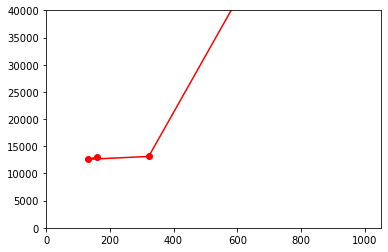

In [ ]:
x = problem_sizes
y = memory
mpl.plot(x, y, 'o-r')
mpl.xlim(0, 1050)
mpl.ylim([0, 40000])